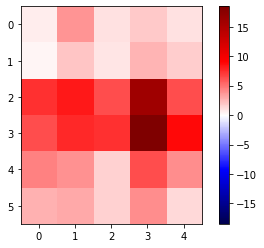

In [358]:
#导入numpy包 
import numpy as np
#设置numpy的输出格式  
np.set_printoptions(threshold=100,precision= 2,suppress=True)
#定义测试数据
M = np.array([[1,1,1,2,1],
              [2,2,2,4,2],
              [8,8,8,16,8],
              [9,9,9,18,9],
              [4,4,4,8,4], 
              [2,2,2,4,2]])+np.random.randn(6,5)
plotM(M,M.max())

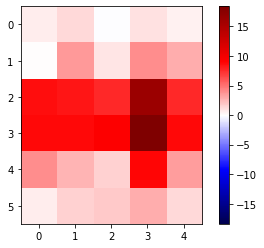

In [350]:
#定义可视化函数，方便后续矩阵绘制
def plotM(M,vmax):
    import matplotlib.pyplot as plt
    #绘制矩阵
    plt.imshow(M,vmin = -vmax,vmax = vmax,cmap = 'seismic')
    #显示颜色的色标
    plt.colorbar()
    plt.show()
plotM(M,M.max())

迭代: 147, 误差: 3.658774774342701e-06


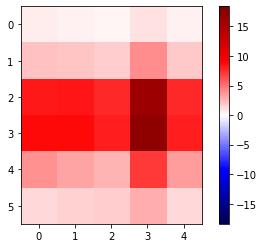

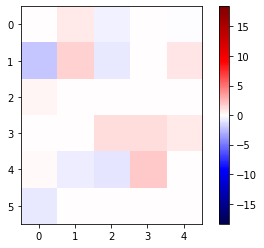

In [351]:
#该循环实现principal component pursuit (PCP)算法
#算法在文章P29：https://arxiv.org/pdf/0912.3599.pdf
#F范数
def frobenius_norm(M):
    return np.linalg.norm(M, ord='fro')
#压缩算子
def shrink(M, tau):
    return np.sign(M) * np.maximum((np.abs(M) - tau), np.zeros(M.shape))
#奇异值阈值
def svd_threshold(M, tau):
    U, S, V = np.linalg.svd(M, full_matrices=False)
    return np.dot(U, np.dot(np.diag(shrink(S, tau)), V))
#rpca求解
def rpca(M,max_iter = 1000):
    #初始化参数
    S = np.zeros(M.shape)                                     #初始化稀疏矩阵S
    Y = np.zeros(M.shape)
    #设定两个拉格朗日乘子
    lmbda = 1 / np.sqrt(np.max(M.shape))
    mu = np.prod(M.shape) / (4 * np.linalg.norm(M, ord=1))
    mu_inv = 1 / mu
    tol = 1E-7 * frobenius_norm(M)                            #收敛判定容差
    iter = 0                                                  #迭代次数
    err = np.Inf                                              #与原始矩阵的误差，即N矩阵的傅里叶范数
    Sk = S
    Yk = Y
    Lk = np.zeros(M.shape)
    while (err > _tol) and (iter < max_iter):
        Lk = svd_threshold(
            M - Sk + mu_inv * Yk, mu_inv)                      #更新L矩阵
        Sk = shrink(
            M - Lk + (mu_inv * Yk), mu_inv * lmbda)            #更新S矩阵
        Yk = Yk + mu * (M - Lk - Sk)                           #更新Y矩阵
        err = frobenius_norm(M - Lk - Sk)
        iter += 1
        if (iter > max_iter) or (err <= tol):                      #收敛或达到最大迭代此时，输出迭代次数与误差
            print('迭代: {0}, 误差: {1}'.format(iter, err))
    L = Lk
    S = Sk
    return L,S

#应用rpca求解
L,S = rpca(M)

#绘制求解结果
plotM(L,M.max())
plotM(S,M.max())

In [352]:
#低秩矩阵
L

array([[ 0.62,  0.48,  0.35,  1.09,  0.54],
       [ 2.16,  2.03,  1.79,  4.08,  1.95],
       [ 8.32,  8.36,  7.68, 16.19,  7.63],
       [ 8.82,  8.84,  8.11, 17.14,  8.09],
       [ 3.92,  3.28,  2.63,  7.08,  3.46],
       [ 1.34,  1.72,  1.79,  2.91,  1.3 ]])

In [356]:
#低秩矩阵的奇异值
np.linalg.svd(L)[1]

array([35.3 ,  0.97,  0.  ,  0.  ,  0.  ])

In [357]:
#稀疏矩阵
S

array([[ 0.  ,  0.83, -0.46,  0.  , -0.08],
       [-2.12,  1.61, -0.85,  0.  ,  0.93],
       [ 0.39,  0.  ,  0.  ,  0.14, -0.  ],
       [ 0.  ,  0.  ,  1.17,  1.24,  0.77],
       [ 0.23, -0.69, -0.92,  1.91,  0.  ],
       [-0.72,  0.  ,  0.1 ,  0.  , -0.  ]])

In [355]:
#噪声矩阵
N = M-L-S
N

array([[ 0.,  0., -0., -0.,  0.],
       [ 0.,  0., -0., -0.,  0.],
       [ 0., -0., -0.,  0.,  0.],
       [-0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0., -0.],
       [-0., -0.,  0.,  0., -0.]])